In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
path = '../../00.Data/07.ML/train/'
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [27]:
import random
import matplotlib.image as mpimg
%matplotlib inline

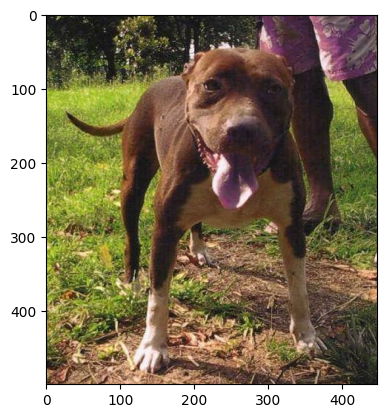

(500, 448, 3)

In [28]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()
image.shape

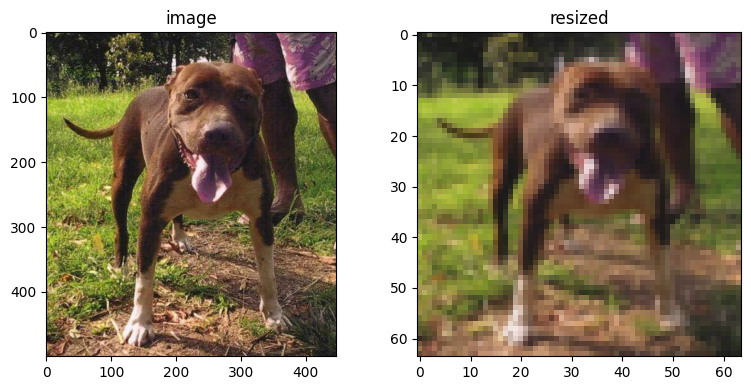

In [29]:
from skimage.transform import resize
resized = resize(image, (64,64,3))

fig, axes = plt.subplots(1,2, figsize=(8,4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("resized")

fig.tight_layout()
plt.show()

In [ ]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total :
    image = mpimg.imread(path + file)
    images.append(resize(image, (64, 64, 3)))

images = np.array(images)

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 0, 1]), array(['cat', 'dog'], dtype='<U3'))

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=50, stratify=labels_encoded)
x_train.shape, x_test.shape

((4000, 128, 128, 3), (1000, 128, 128, 3))

In [ ]:
samples = random.choices(population=range(0,4099), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples) :
    plt.subplot(2, 4, idx+1)
    plt.imshow(x_train[n], cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])
plt.tight_layout()
plt.show()

In [20]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
import time
start_time = time.time()
hist = model.fit(x_train.reshape(4000, 128, 128, 3), y_train, epochs=10, verbose=1, validation_data=(x_test.reshape(1000,128,128,3), y_test))
print("fit time : ", time.time() - start_time)

2024-05-13 10:51:41.659481: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.
2024-05-13 10:51:42.970866: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.5066 - loss: 0.8235 - val_accuracy: 0.5030 - val_loss: 0.7006
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5482 - loss: 0.6881 - val_accuracy: 0.6460 - val_loss: 0.6389
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5997 - loss: 0.6531 - val_accuracy: 0.6400 - val_loss: 0.6233
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6460 - loss: 0.6294 - val_accuracy: 0.6700 - val_loss: 0.6163
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6801 - loss: 0.6031 - val_accuracy: 0.6990 - val_loss: 0.5926
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7047 - loss: 0.5640 - val_accuracy: 0.6900 - val_loss: 0.5784
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7179 - loss: 0.5491 - val_accuracy: 0.6920 - val_loss: 0.5721
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7558 - loss: 0.4990 - val_acc

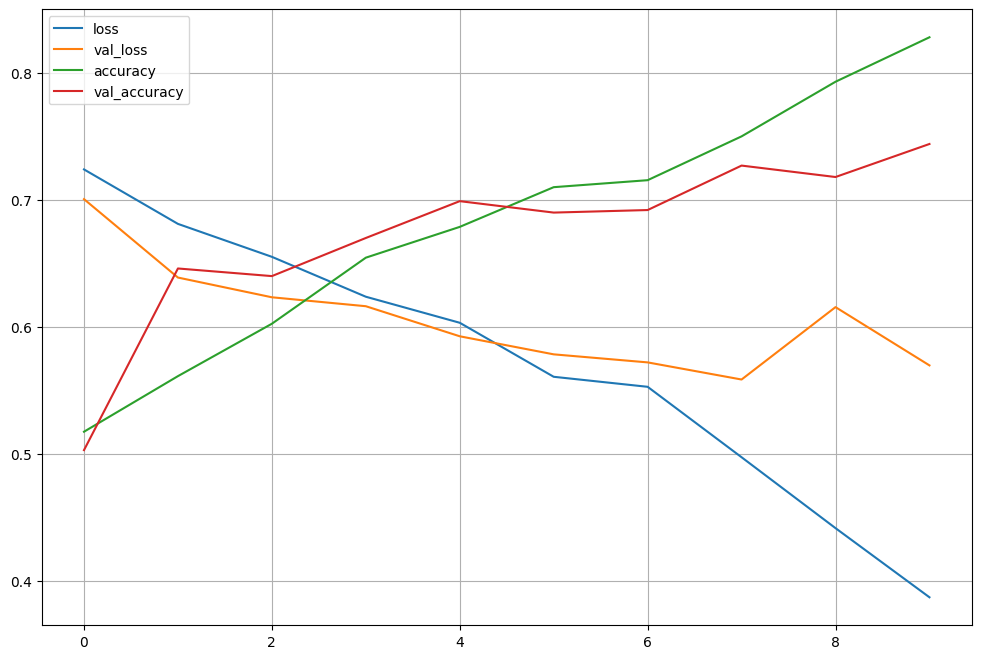

In [24]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target :
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()